## 주성분 분석 (PCA. Principal Component Analysis)
- 머신러닝의 비지도 학습 기법 중 하나인 차원 축소 알고리즘 
- 데이터에 포함된 중요한 정보는 최대한 유지하면서, 데이터의 차원을 줄여 분석과 학습을 효율적으로 만듦
- 원리
  - 데이터의 변동성이 가장 큰 방향을 찾고, 그 방향을 기준으로 새 좌표(주성분)를 만듦
  - 이 새로운 축에 원본 데이터를 투영하여 더 적은 수의 차원으로 변환함

원본 : (100, 3)
PCA 후: (100, 2)


Text(0.5, 1.0, 'PCA후 데이터 (2D)')

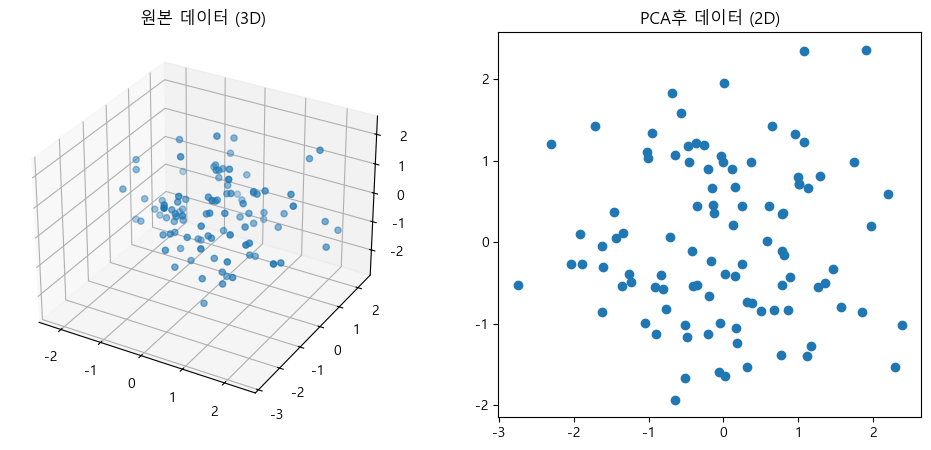

In [65]:
# 3차원 데이터 생성
import numpy as np

np.random.seed(0)         # 시드 0으로 설정
x = np.random.randn(100, 3)   # 3차원으로 100개 데이터 생성
x.shape
# => 넘파이 관점에서는 2차원 배열
# => 머신러닝에서 "차원"은 데이터 한개가 가지는 특성(feature)을 의미함!
#    각 행은 "하나의 점", 그 점을 표현하는 속성이 3개라면 --> (x,y,z) 즉, 3차원 공간의 점!

# PCA(주성분분석)로 2차원으로 축소
# (100,3) --> (100,2)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)     # n_components: 축소할 차원수. 주성분 수.

x_pca = pca.fit_transform(x)  # 데이터 x 차원 축소

print(f'원본 : {x.shape}')
print(f'PCA 후: {x_pca.shape}')

# 시각화
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

# plt.figure(figsize=(12,5))
fig = plt.figure(figsize=(12,5))

# * 원본 데이터
# plt.subplot(1,2,1)
ax = fig.add_subplot(1,2,1, projection='3d')

# plt.scatter(x[:,0],x[:,1],x[:,2])
ax.scatter(x[:,0],x[:,1],x[:,2])
# plt.title("원본 데이터")
ax.set_title("원본 데이터 (3D)")

# * 축소 후 데이터
plt.subplot(1,2,2)
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.title("PCA후 데이터 (2D)")

원본 데이터의 형태 : (150, 4)
pca 후 데이터 형태: (150, 2)
각 주성분의 분산 비율 : [0.92461872 0.05306648]
주성분 분산 비율 합:0.9776852063187963


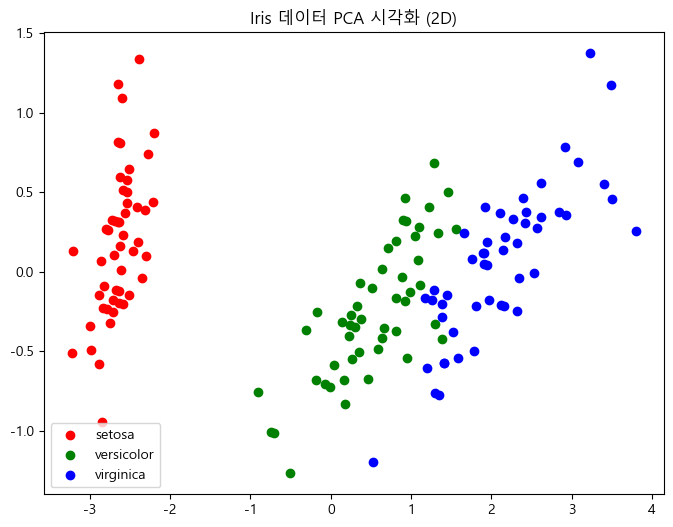

In [66]:
# iris 데이터 불러오기
from sklearn.datasets import load_iris

iris=load_iris()

x=iris.data     # Feature
y=iris.target   # 품종(0,1,2)
target_names = iris.target_names  # 품종명
print(f'원본 데이터의 형태 : {x.shape}')
# => (150,4) : 150개의 4차원 데이터(특징 4개)

# PCA (4D -> 2D)
pca=PCA(n_components=2)
# n_components 지정하지 않을 경우 모든 구성 요소 유지
# 2 지정 시 가장 중요한 주성분 두 개만 남겨 2차원으로 변환
# -> 데이터의 분산이 가장 큰 방향부터 새로운 축을 생성하여
#    그 축을 기준으로 데이터를 다시 표현

x_pca = pca.fit_transform(x)

print(f'pca 후 데이터 형태: {x_pca.shape}')

# 시각화
plt.figure(figsize=(8,6))
colors=['r','g','b'] # 그래프에서 표시할 색상 목록

for c, i, target in zip(colors, [0,1,2], target_names):
  plt.scatter(
    x_pca[y == i, 0],
    x_pca[y == i,1],
    color=c,
    label=target
  )
plt.legend()
plt.title("Iris 데이터 PCA 시각화 (2D)")

# 분산 비율 확인
print(f"각 주성분의 분산 비율 : {pca.explained_variance_ratio_}")
print(f'주성분 분산 비율 합:{sum(pca.explained_variance_ratio_)}')
# 각 주성분의 분산 비율 : [0.92461872 0.05306648]
# => 각 주성분이 데이터 전체 분산에서 차지하는 비율
# => 합계가 97%로 데이터 손실이 매우 적은 편임

데이터 형태:(1797, 64)
PCA 후 데이터: x_pca.shape


Text(0.5, 1.0, 'Digits PCA')

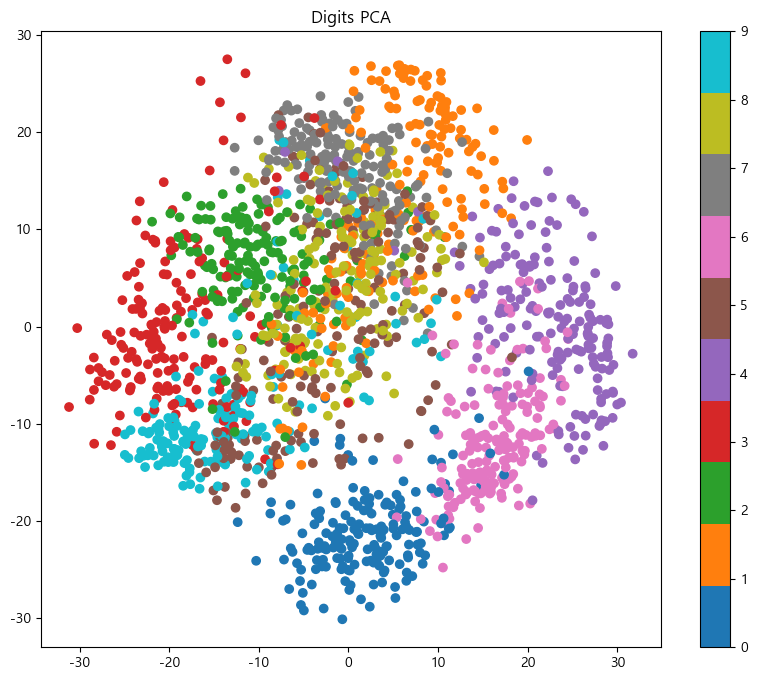

In [67]:
from sklearn.datasets import load_digits

# 데이터 불러오기
digits=load_digits(as_frame=True)
# 데이터 형태 확인
x=digits.data
y=digits.target
print(f'데이터 형태:{x.shape}')
# (1797,64) =>1797행(데이터 개수), 64열(Feature)-> 64차원 데이터
# 2차원으로 축소
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)
# * fit : PCA 기준축(주성분) 학습
# * transform : 원본 데이터를 주성분 기준 좌표로 변환
print(f'PCA 후 데이터: x_pca.shape')

# print(x)
# print(x_pca)

# 시각화

plt.figure(figsize=(10,8))
 
sct=plt.scatter(
    x_pca[:,0],
    x_pca[:,1],
    c=y,
    cmap='tab10'
)
plt.colorbar(sct, ticks=list(set(y)))

plt.title('Digits PCA')

wine datasets :(178, 13)
PCA 2D - 각 주성분의 분산 비율 : [0.99809123 0.00173592]
PCA 2d - 분산 비율 합 : 0.9998271461166032
PCA 3D - 각 주성분 별 분산 비율: [9.98091230e-01 1.73591562e-03 9.49589576e-05]
PCA 3D - 각 주성분 분산 비율 : 0.9999221050741547


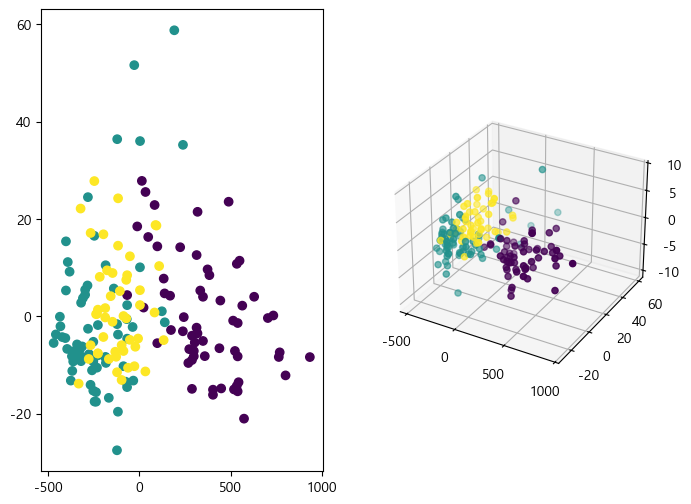

In [69]:
# Wine Dataset
from sklearn.datasets import load_wine
#데이터 불러오기
wine=load_wine(as_frame=True)
x=wine.data
y=wine.target
print(f'wine datasets :{x.shape}')

#2차원으로 차원 축소
pca_2d=PCA(n_components=2)
x_pca=pca_2d.fit_transform(x)



print(f'PCA 2D - 각 주성분의 분산 비율 : {pca_2d.explained_variance_ratio_}')
print(f'PCA 2d - 분산 비율 합 : {sum(pca_2d.explained_variance_ratio_)}')

#3차원으로 차원 축소
pca_3d=PCA(n_components=3)
x_pca_3d=pca_3d.fit_transform(x)


#+ 시각화, 분산 비율 확인(2차원)
fig=plt.figure(figsize=(8,6))
ad=fig.add_subplot(1,2,1)
ad.scatter(
  x_pca[:,0],
  x_pca[:,1],
  c=y
)

# + 시각화, 분산 비율 확인(3차원)
ax=fig.add_subplot(1,2,2,projection='3d')
ax.scatter3D(
  x_pca_3d[:,0],
  x_pca_3d[:,1],
  x_pca_3d[:,2],
  c=y
)

print(f'PCA 3D - 각 주성분 별 분산 비율: {pca_3d.explained_variance_ratio_}')
print(f'PCA 3D - 각 주성분 분산 비율 : {sum(pca_3d.explained_variance_ratio_)}')
